In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/NLP_Amazon_Data_Preparation_prediction-deploy.ipynb
/kaggle/input/dataset/Reviews.csv
/kaggle/input/dataset/database.sqlite


In [2]:
# depend on text what type of score we get is our whole moto

df=pd.read_csv(r"/kaggle/input/dataset/Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
df['Helpful%']=np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
df['Helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [8]:
Bin=[-1,0,0.2,0.4,0.6,0.8,1]
categories=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%']
df['%upvote']=pd.cut(df['Helpful%'],bins=Bin,labels=categories)

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
# Apply Exploratory Data Analysis on Data

df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %upvote                                                             
1     Empty                      8060    8060     8060    8060      8060  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     Empty                      4234    4234     4234    4234      4234  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     Empty                      5062    5062     5062    5062      5062  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [11]:
df_s=df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [12]:
pivot=df_s.pivot(index='Score',columns='%upvote')
pivot

Id                                   
%upvote  Empty 0-20% 20-40% 40-60% 60-80% 80-100%
Score                                            
1         8060  2338   4649   6586   5838   12531
2         4234   762   1618   3051   2486    7014
3         5062   474   1506   3384   2754   11037
4         4780   116    909   3185   2941   26707
5        11638   432   2275  10312  11060  140661

In [13]:
#data visualization module
import seaborn as sns

<AxesSubplot:xlabel='None-%upvote', ylabel='Score'>

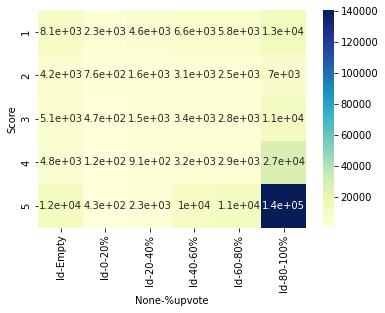

In [14]:
sns.heatmap(pivot,annot=True,cmap='YlGnBu')

In [15]:
# Nlp to convert text to integer format ,Apply bag of words
# 1.apply bag of words on data 
# 2.check model accuracy
# 3.fetch 20 positive and negative words

In [16]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [17]:
# filter ko apply kro in data frame to select rows
df2=df[df['Score']!=3]

In [18]:
# all dependent in y variable ,all independent in x variable
x=df2['Text']
y=df2['Score']

In [19]:
y.unique()

array([5, 1, 4, 2])

In [20]:
# mapping 5 and 4 with 1 and 1 and 2 with 0
# to convert my problem into some classification problem

In [21]:
# 1.make dictionary
# 2.map it with column
y_dict={5:1,4:1,2:0,1:0}

In [22]:
y=df2['Score'].map(y_dict)
y.shape

(525814,)

In [23]:
#now converting text into some vector using nlp

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
# make object 
c=CountVectorizer(stop_words='english')

In [25]:
x_c=c.fit_transform(x)
# give frequency matrix

In [26]:
# x_c.shape
x_c.shape[1]
# 114969 are number of features+ (6 or 7) new earlier features

114969

In [27]:
# making new machine learning model
# first split the data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_c,y)

In [29]:
x_train.shape

(394360, 114969)

In [30]:
# model selection

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# make object
log= LogisticRegression()

In [33]:
# final step to fit,this will store all the relationship we need
model=log.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [34]:
model.score(x_test,y_test)

0.9363503583002419

In [35]:
#fetch 20 positive and 20 negative words

In [36]:
w= c.get_feature_names()
# w

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
coef= model.coef_.tolist()[0]
# coef

In [38]:
# creating dataframe ,dictionary me assign col and give the col data)

In [39]:
coef_df= pd.DataFrame({'Word':w, 'Coefficient':coef})
# coef_df

In [40]:
coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=False)
# coef_df.head(20)

In [41]:
# coef_df.tail(20)

In [42]:
# automate the whole process

In [43]:
def my_model(x,y,model,nlp,condition):
    x_c=nlp.fit_transform(x)
    x_train,x_test,y_train,y_test= train_test_split(x_c,y)
    model.fit(x_train,y_train)
    scoree=model.score(x_test,y_test)
    print(f"The accuracy of model is: {scoree}")
    
    if condition==1:
        w= nlp.get_feature_names()
        coef= model.coef_.tolist()[0]
        coef_df= pd.DataFrame({'Word':w, 'Coefficient':coef})
        coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=False)
        print(f"\nTop 20 positive words are:\n{coef_df.head(20)}")
        print(f"Top 20 negative words are:\n{coef_df.tail(20)}")

    

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

my_model(x,y,LogisticRegression(),CountVectorizer(stop_words='english'),1)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The accuracy of model is: 0.9360460693474524

Top 20 positive words are:
              Word  Coefficient
80600   pleasantly     4.150522
39072     downside     3.026986
5865     addicting     3.026786
94667    skeptical     2.817602
113138     worries     2.453862
87967       resist     2.432598
40342   economical     2.409727
35726       delish     2.386363
39214     drawback     2.246878
78641        penny     2.239156
38394       divine     2.235984
40135      easiest     2.221985
105162     trainer     2.188195
103080    thankful     2.183907
111911        whim     2.178857
55029       hooked     2.174076
54130     hesitant     2.141260
35691    delighted     2.098123
35641    delicious     2.072458
96353     soothing     2.069789
Top 20 negative words are:
                  Word  Coefficient
89868            ruins    -2.442713
106894     unappealing    -2.541711
65064            lousy    -2.547421
50059          glowing    -2.550556
37563   disappointment    -2.563113
62401       

In [45]:
#way of prediction,confusion matrix-automating it also

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score

def predict(x,y,model,nlp):
    x_c=nlp.fit_transform(x)
    x_train,x_test,y_train,y_test= train_test_split(x_c,y)
    model.fit(x_train,y_train)
    predictions= model.predict(x_test)
    cm =confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)


In [47]:
c=CountVectorizer()
lr=LogisticRegression()

In [48]:
predict(x,y,lr,c)

[[ 15184   2750]
 [  5347 108173]]
0.9384043087315715


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [49]:
# apply more techniques of NLP and Machine Learning

In [50]:
# using another ml model which dummy classifier

In [51]:
from sklearn.dummy import DummyClassifier
model=DummyClassifier()
c=CountVectorizer()

In [52]:
my_model(x,y,model,c,0)

The accuracy of model is: 0.8441431983811828


In [53]:
# using TF IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')
x_c= tfidf.fit_transform(x)

In [55]:
my_model(x,y,lr,tfidf,0)

The accuracy of model is: 0.9345854823740624


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
predict(x,y,lr,c)

[[ 15161   2724]
 [  5353 108216]]
0.9385564532079663


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [57]:
# use random forest,knl,classification algorithms

In [58]:
# Apply Techniques of handling imbalance data if data is imbalance
# doing cross validation using grid search cv and do predictions
# checking accuracy of your cross validated model.

In [59]:
y.value_counts()

1    443777
0     82037
Name: Score, dtype: int64

In [60]:
#random oversample

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
os= RandomOverSampler()
x_train_res,y_train_res= os.fit_resample(x_c,y)

In [63]:
x_train_res.shape

(887554, 114969)

In [64]:
y_train_res.shape

(887554,)

In [65]:
# for count of diff diff classes available int our data
from collections import Counter 

In [66]:
print(f"Original dataset{Counter(y)}")
print(f"Original dataset{Counter(y_train_res)}")      

Original datasetCounter({1: 443777, 0: 82037})
Original datasetCounter({1: 443777, 0: 443777})


In [67]:
# doing cross validation now

In [68]:
from sklearn.linear_model import LogisticRegression
model_class= LogisticRegression()

In [69]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

In [70]:

grid ={'C': 10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [71]:
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(estimator=model_class,param_grid=grid,cv=5,n_jobs=-1,scoring= 'f1_macro')

In [72]:
clf.fit(x_train_res,y_train_res)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_c,y)

In [74]:
pred= clf.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,pred)

array([[ 19481,   1194],
       [  7479, 103300]])

In [76]:
accuracy_score(y_test,pred)

0.9340225478114017